# Cell 1 – Import & đường dẫn

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Cell 2 – Load kết quả đã lưu

In [2]:
PROJECT_ROOT = Path("..").resolve()
METRICS_DIR = PROJECT_ROOT / "data" / "processed"

# ===== Load Baseline =====
with open(METRICS_DIR / "metrics.json", "r", encoding="utf-8") as f:
    baseline_metrics = json.load(f)

# ===== Load Self-training =====
with open(METRICS_DIR / "metrics_self_training.json", "r", encoding="utf-8") as f:
    self_training_payload = json.load(f)

# ===== Load Co-training =====
with open(METRICS_DIR / "metrics_co_training.json", "r", encoding="utf-8") as f:
    co_training_payload = json.load(f)


# Cell 3 — Trích xuất metric cần so sánh

In [3]:
compare_df = pd.DataFrame([
    {
        "Method": "Baseline (Supervised)",
        "Accuracy": baseline_metrics["accuracy"],
        "F1_macro": baseline_metrics["f1_macro"],
    },
    {
        "Method": "Self-training",
        "Accuracy": self_training_payload["test_metrics"]["accuracy"],
        "F1_macro": self_training_payload["test_metrics"]["f1_macro"],
    },
    {
        "Method": "Co-training",
        "Accuracy": co_training_payload["test_metrics"]["accuracy"],
        "F1_macro": co_training_payload["test_metrics"]["f1_macro"],
    },
])

compare_df

,Method,Accuracy,F1_macro
0,Baseline (Supervised),0.602243,0.471532
1,Self-training,0.589047,0.534326
2,Co-training,0.470398,0.339354


# Cell 4 — Biểu đồ so sánh Accuracy

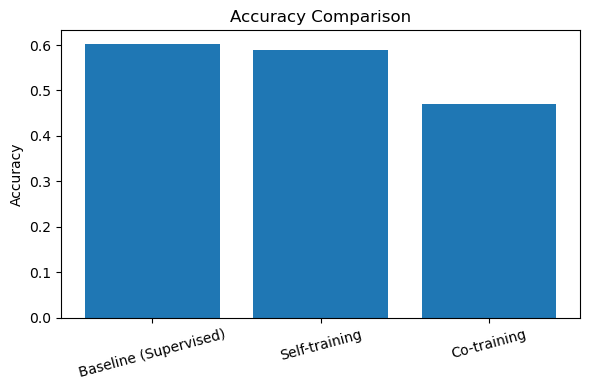

In [4]:
plt.figure(figsize=(6, 4))
plt.bar(compare_df["Method"], compare_df["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Cell 5 — Biểu đồ so sánh F1-macro

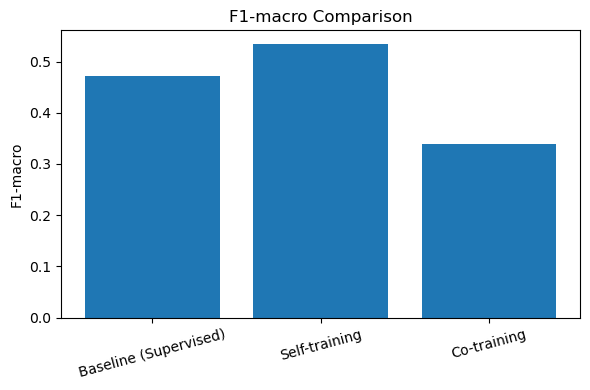

In [5]:
plt.figure(figsize=(6, 4))
plt.bar(compare_df["Method"], compare_df["F1_macro"])
plt.ylabel("F1-macro")
plt.title("F1-macro Comparison")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Cell 6 — Chọn mô hình cuối cùng

In [6]:
best_model = compare_df.sort_values("F1_macro", ascending=False).iloc[0]

print("Selected final model:", best_model["Method"])
print("Best F1-macro:", best_model["F1_macro"])

Selected final model: Self-training
Best F1-macro: 0.5343258092284096


# Cell 7 — So sánh diễn biến Self-training vs Co-training

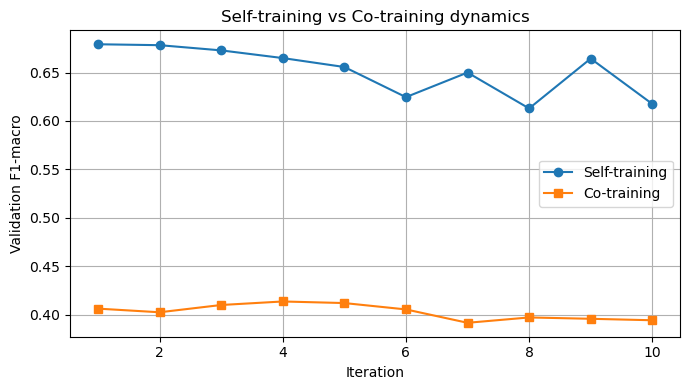

In [7]:
self_hist = pd.DataFrame(self_training_payload["history"])
co_hist = pd.DataFrame(co_training_payload["history"])

plt.figure(figsize=(7, 4))
plt.plot(self_hist["iter"], self_hist["val_f1_macro"], label="Self-training", marker="o")
plt.plot(co_hist["iter"], co_hist["val_f1_macro"], label="Co-training", marker="s")
plt.xlabel("Iteration")
plt.ylabel("Validation F1-macro")
plt.title("Self-training vs Co-training dynamics")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()